In [2]:
!pip install pandas
!pip install folium

In [1]:
import pandas as pd
import folium

# Join datasets

In [2]:


#,"2017","2016","2015","2014","2013","2012","2011"
df = pd.read_csv('trento/trento_2020.csv',delimiter=',')
df1 = pd.read_csv('trento/trento_2019.csv',delimiter=',')
df2= pd.read_csv('trento/trento_2018.csv',delimiter=',')
df3 = pd.read_csv('trento/trento_2017.csv',delimiter=',')
df4= pd.read_csv('trento/trento_2016.csv',delimiter=',')
df5= pd.read_csv('trento/trento_2015.csv',delimiter=',')
df6= pd.read_csv('trento/trento_2014.csv',delimiter=',')
df7 =pd.read_csv('trento/trento_2013.csv',delimiter=',')
df8= pd.read_csv('trento/trento_2012.csv',delimiter=',')
df9= pd.read_csv('trento/trento_2011.csv',delimiter=',')

df.append(df1)
df = df.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df = df.append(df7)
df = df.append(df8)
df = df.append(df9)
# Ora possiedo un dataset di 24k colonne
df

,Unnamed: 0,Unnamed: 0.1,title,subtitle,link,timestamp,text,keywords,address,location,point,latitude,longitude,altitude
0,0,0,Recuperato il corpo di Daniele Catorci,"Il giovane alpinista, dottorando all'Universit...",http://www.trentotoday.it/cronaca/daniele-cato...,29 giugno 2020 19:48,E' stato recuperato nel pomeriggio di lunedì 2...,"['incidenti montagna', 'morti montagna']","Gardolo,via Giambattista Unterveger",NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0
1,1,1,Cade nel fiume: ripescato vivo un chilometro e...,Diversi corpi di Vigili del Fuoco hanno presid...,http://www.trentotoday.it/cronaca/cade-fiume-b...,29 giugno 2020 17:47,E' stato ripescato vivo dalle acque dell'Isarc...,"['annegamenti', 'fiumi']","Gardolo,Via Alto Adige","Via Alto Adige, Spini di Gardolo, Trento, Terr...","(46.1148209, 11.1064463, 0.0)",46.114821,11.106446,0.0
2,2,2,"La Provincia: ""L'orso del video sarà catturato...",La nota della Pat sul video che sta spopolando...,http://www.trentotoday.it/green/orso-video-cat...,29 giugno 2020 17:28,Un orso segue pacificamente un'escursionista n...,"['orsi', 'orso', 'video']",NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0
3,3,3,Sagra della braciola d'orso con il patrocinio ...,"La notizia ha gettato benzina sul fuoco, ma l'...",http://www.trentotoday.it/attualita/sagra-brac...,29 giugno 2020 16:04,"Sagra della braciola di orso, con il patrocini...","['fake news', 'orsi']","Trento,Piazza Dante","Trento, Piazza Dante, Centro storico Trento, T...","(46.0722416, 11.1193186, 0.0)",46.072242,11.119319,0.0
4,4,4,Dramma sul Gran Paradiso: individuato lo zaino...,Nel crepaccio dove il giovane alpinista è cadu...,http://www.trentotoday.it/cronaca/morto-gran-p...,29 giugno 2020 15:12,Sono ancora in corso le operazioni a 3.400 met...,"['Daniele Catorci', 'Argomenti:', 'morti', 'mo...","Oltrefersina,Via Aosta",NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,352,352,Progettone: niente accordo sugli stipendi dei ...,I sindacati non hanno raggiunto l'intesa con l...,http://www.trentotoday.it/economia/progettone-...,09 novembre 2011 17:59,\n,['lavoro'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0
353,353,353,Le nuove frontiere di internet: due giorni di ...,Presenti a Trento oltre cento relatori per dis...,http://www.trentotoday.it/cronaca/internet-con...,09 novembre 2011 17:20,\n\n,['tecnologie'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0
354,354,354,Centro islamico a Gardolo: il Consiglio di Sta...,La comunità musulmana trentina potrà utilizzar...,http://www.trentotoday.it/cronaca/moschea-gard...,09 novembre 2011 15:50,Gardolo avrà il suo centro islamico: il Consig...,['religione'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0
355,355,355,Piedibus: il servizio gratuito arriva anche a ...,"Hanno già aderito trentasei bambini, suddivisi...",http://www.trentotoday.it/cronaca/piedibus-mea...,09 novembre 2011 15:25,Grazie alla disponibilità di sedici genitori v...,['trasporti'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0


# Change timestamp column

In [3]:
# Sacrifico l'orario poiché é l'ora della pubblicazione del articolo
import datetime

def funzioneConvertiData(stringa):
    month = {	'gennaio':'01',
                'febbraio':'02',
                'marzo':'03',
                'aprile':'04',
                'maggio':'05',
                'giugno':'06',
                'luglio':'07',
                'agosto':'08',
                'settembre':'09',
                'ottobre':'10',
                'novembre':'11',
                'dicembre':'12'
            }
    for ita, eng in month.items():
        stringa = stringa.replace(ita.lower(), eng)
    return stringa

def conversioneInData(stringa): 
    d = datetime.datetime.strptime(stringa, '%d %m %Y %H:%M')
    year = d.strftime('%Y')
    month = d.strftime('%m')
    day = d.strftime('%d')
    return d.strftime('%Y/%m/%d')
    
df['timestamp'] =  df['timestamp'].apply(lambda x: funzioneConvertiData(x))
df['timestamp'] =  df['timestamp'].apply(lambda x: conversioneInData(x))
df['year'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d').strftime('%Y'))
df['month'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d').strftime('%m'))
df['day'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d').strftime('%d'))
df

,Unnamed: 0,Unnamed: 0.1,title,subtitle,link,timestamp,text,keywords,address,location,point,latitude,longitude,altitude,year,month,day
0,0,0,Recuperato il corpo di Daniele Catorci,"Il giovane alpinista, dottorando all'Universit...",http://www.trentotoday.it/cronaca/daniele-cato...,2020/06/29,E' stato recuperato nel pomeriggio di lunedì 2...,"['incidenti montagna', 'morti montagna']","Gardolo,via Giambattista Unterveger",NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2020,06,29
1,1,1,Cade nel fiume: ripescato vivo un chilometro e...,Diversi corpi di Vigili del Fuoco hanno presid...,http://www.trentotoday.it/cronaca/cade-fiume-b...,2020/06/29,E' stato ripescato vivo dalle acque dell'Isarc...,"['annegamenti', 'fiumi']","Gardolo,Via Alto Adige","Via Alto Adige, Spini di Gardolo, Trento, Terr...","(46.1148209, 11.1064463, 0.0)",46.114821,11.106446,0.0,2020,06,29
2,2,2,"La Provincia: ""L'orso del video sarà catturato...",La nota della Pat sul video che sta spopolando...,http://www.trentotoday.it/green/orso-video-cat...,2020/06/29,Un orso segue pacificamente un'escursionista n...,"['orsi', 'orso', 'video']",NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2020,06,29
3,3,3,Sagra della braciola d'orso con il patrocinio ...,"La notizia ha gettato benzina sul fuoco, ma l'...",http://www.trentotoday.it/attualita/sagra-brac...,2020/06/29,"Sagra della braciola di orso, con il patrocini...","['fake news', 'orsi']","Trento,Piazza Dante","Trento, Piazza Dante, Centro storico Trento, T...","(46.0722416, 11.1193186, 0.0)",46.072242,11.119319,0.0,2020,06,29
4,4,4,Dramma sul Gran Paradiso: individuato lo zaino...,Nel crepaccio dove il giovane alpinista è cadu...,http://www.trentotoday.it/cronaca/morto-gran-p...,2020/06/29,Sono ancora in corso le operazioni a 3.400 met...,"['Daniele Catorci', 'Argomenti:', 'morti', 'mo...","Oltrefersina,Via Aosta",NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2020,06,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,352,352,Progettone: niente accordo sugli stipendi dei ...,I sindacati non hanno raggiunto l'intesa con l...,http://www.trentotoday.it/economia/progettone-...,2011/11/09,\n,['lavoro'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2011,11,09
353,353,353,Le nuove frontiere di internet: due giorni di ...,Presenti a Trento oltre cento relatori per dis...,http://www.trentotoday.it/cronaca/internet-con...,2011/11/09,\n\n,['tecnologie'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2011,11,09
354,354,354,Centro islamico a Gardolo: il Consiglio di Sta...,La comunità musulmana trentina potrà utilizzar...,http://www.trentotoday.it/cronaca/moschea-gard...,2011/11/09,Gardolo avrà il suo centro islamico: il Consig...,['religione'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2011,11,09
355,355,355,Piedibus: il servizio gratuito arriva anche a ...,"Hanno già aderito trentasei bambini, suddivisi...",http://www.trentotoday.it/cronaca/piedibus-mea...,2011/11/09,Grazie alla disponibilità di sedici genitori v...,['trasporti'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2011,11,09


# Controllo le keywords uniche

In [4]:
import re

df["list_keywords"] = df["keywords"].apply(lambda x: re.findall('\'([^\']*)\'', x))

In [5]:
#Check unique keywords
from collections import Counter
# df_temp = df[df['year']=='2020']
df_temp = df
temp_l = list(df_temp["list_keywords"])
temp_l = [j for i in temp_l for j in i]
cnt = Counter(temp_l)

ing_value_count = cnt.most_common()
ing_value_count.sort(key= lambda x: x[1], reverse=True)
ing = [(x,y) for x,y in ing_value_count]
len(ing)

3954

In [16]:
df

,Unnamed: 0,Unnamed: 0.1,title,subtitle,link,timestamp,text,keywords,address,location,point,latitude,longitude,altitude,year,month,day,list_keywords
0,0,0,Recuperato il corpo di Daniele Catorci,"Il giovane alpinista, dottorando all'Universit...",http://www.trentotoday.it/cronaca/daniele-cato...,2020/06/29,E' stato recuperato nel pomeriggio di lunedì 2...,"['incidenti montagna', 'morti montagna']","Gardolo,via Giambattista Unterveger",NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2020,06,29,"[incidenti montagna, morti montagna]"
1,1,1,Cade nel fiume: ripescato vivo un chilometro e...,Diversi corpi di Vigili del Fuoco hanno presid...,http://www.trentotoday.it/cronaca/cade-fiume-b...,2020/06/29,E' stato ripescato vivo dalle acque dell'Isarc...,"['annegamenti', 'fiumi']","Gardolo,Via Alto Adige","Via Alto Adige, Spini di Gardolo, Trento, Terr...","(46.1148209, 11.1064463, 0.0)",46.114821,11.106446,0.0,2020,06,29,"[annegamenti, fiumi]"
2,2,2,"La Provincia: ""L'orso del video sarà catturato...",La nota della Pat sul video che sta spopolando...,http://www.trentotoday.it/green/orso-video-cat...,2020/06/29,Un orso segue pacificamente un'escursionista n...,"['orsi', 'orso', 'video']",NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2020,06,29,"[orsi, orso, video]"
3,3,3,Sagra della braciola d'orso con il patrocinio ...,"La notizia ha gettato benzina sul fuoco, ma l'...",http://www.trentotoday.it/attualita/sagra-brac...,2020/06/29,"Sagra della braciola di orso, con il patrocini...","['fake news', 'orsi']","Trento,Piazza Dante","Trento, Piazza Dante, Centro storico Trento, T...","(46.0722416, 11.1193186, 0.0)",46.072242,11.119319,0.0,2020,06,29,"[fake news, orsi]"
4,4,4,Dramma sul Gran Paradiso: individuato lo zaino...,Nel crepaccio dove il giovane alpinista è cadu...,http://www.trentotoday.it/cronaca/morto-gran-p...,2020/06/29,Sono ancora in corso le operazioni a 3.400 met...,"['Daniele Catorci', 'Argomenti:', 'morti', 'mo...","Oltrefersina,Via Aosta",NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2020,06,29,"[Daniele Catorci, Argomenti:, morti, morti mon..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,352,352,Progettone: niente accordo sugli stipendi dei ...,I sindacati non hanno raggiunto l'intesa con l...,http://www.trentotoday.it/economia/progettone-...,2011/11/09,\n,['lavoro'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2011,11,09,[lavoro]
353,353,353,Le nuove frontiere di internet: due giorni di ...,Presenti a Trento oltre cento relatori per dis...,http://www.trentotoday.it/cronaca/internet-con...,2011/11/09,\n\n,['tecnologie'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2011,11,09,[tecnologie]
354,354,354,Centro islamico a Gardolo: il Consiglio di Sta...,La comunità musulmana trentina potrà utilizzar...,http://www.trentotoday.it/cronaca/moschea-gard...,2011/11/09,Gardolo avrà il suo centro islamico: il Consig...,['religione'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2011,11,09,[religione]
355,355,355,Piedibus: il servizio gratuito arriva anche a ...,"Hanno già aderito trentasei bambini, suddivisi...",http://www.trentotoday.it/cronaca/piedibus-mea...,2011/11/09,Grazie alla disponibilità di sedici genitori v...,['trasporti'],NaN,NaN,"(0.0, 0.0, 0.0)",0.000000,0.000000,0.0,2011,11,09,[trasporti]


# Keywords importanti per il progetto
* furti
* droga
* orso
* violenza
* violenza sessuale
* truffe
* rapine
* incidenti stradali
* omicidio
* degrado
* morti
* prostituzione
* coronavirus

Quello che si potrebbe fare é una wordcloud fatta bene con queste keywords in modo da avere una prima immagine chiarificatrice.
La base da cui parto é quella del sole 24 ore https://lab24.ilsole24ore.com/indice-della-criminalita/
Noi lo dividiamo per categorie. dalla piú popolare fino all'ultima. quello che dobbiamo fare quindi é plottare le keywords con un histogramma 

In [7]:
arguments_list = [ 'furti','droga','orso','violenza','violenza sessuale' ,'truffe','rapine','incidenti stradali' ,'omicidio','degrado','morti' ,'prostituzione' ,'coronavirus']
keywords = [(x,y) for x,y in ing if x in arguments_list]

Plotto il grafico per un anno specifico

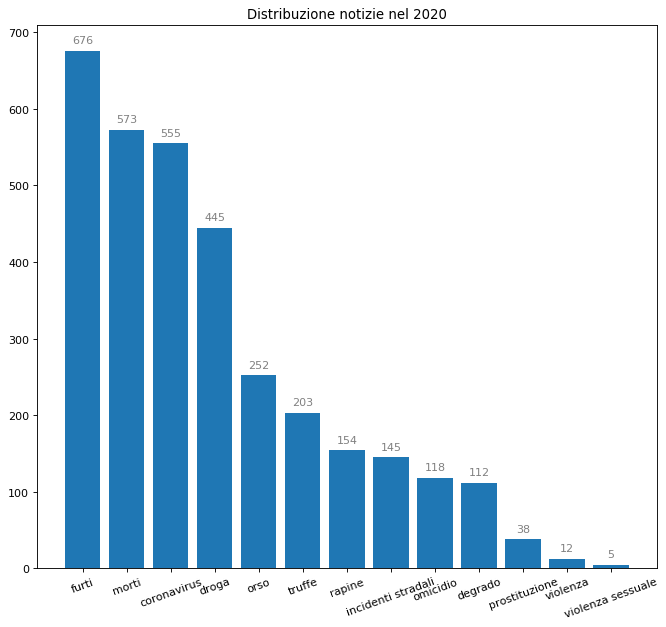

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 9), dpi=80, facecolor='w', edgecolor='k')
 
# Choose the height of the bars
height = [a_tuple[1] for a_tuple in keywords]
 
# Choose the names of the bars
bars = [a_tuple[0] for a_tuple in keywords]
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
plt.title('Distribuzione notizie nel 2020')
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=20)

style = dict(size=10, color='gray')
for i in range(0, len(height)):
    plt.text(i, height[i] + 10 , height[i] , ha='center', **style)
 
# Show graphic
plt.show()


# TODO
Da fare sono le timeline
Cercare di utilizzare una visualizzazione, dare una regola, uno stile, una storia. Da pensare.
Il codice per il seguente plot deve essere formato cosí

Funzione core che calcola ogni 3 mesi il numero di notizie relative ad un argomento. Quindi per ogni argomento, contare mensilmente e mettere in un dataset che ha come colonne le date e come valori il count trimestrale. 

fatto questo dovremmo avere tutti i dati relativi a quello che abbiamo


In [14]:
for argument in arguments_list:
    df_temp = df_temp.append(df[df['keywords'].str.contains(argument)])

In [18]:
df_temp = df_temp.sort_values('timestamp')

In [27]:
# # libraries and data
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
 
# # Make a data frame
df=pd.DataFrame({'x': range(1,11), 
                  'y1': np.random.randn(10), 
                  'y2': np.random.randn(10)+range(1,11), 
                 'y3': np.random.randn(10)+range(11,21), 
                 'y4': np.random.randn(10)+range(6,16), 
                 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 
                 'y6': np.random.randn(10)+range(2,12), 
                 'y7': np.random.randn(10)+range(5,15), 
                 'y8': np.random.randn(10)+range(4,14) })
df
# #plt.style.use('fivethirtyeight')
# plt.style.use('seaborn-darkgrid')
# my_dpi=96
# plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# # multiple line plot
# for column in df.drop('x', axis=1):
#    plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
 
# # Now re do the interesting curve, but biger with distinct color
# plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4, alpha=0.7)
 
# # Change xlim
# plt.xlim(0,12)
 
# # Let's annotate the plot
# num=0
# for i in df.values[9][1:]:
#    num+=1
#    name=list(df)[num]
#    if name != 'y5':
#       plt.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')
 
# # And add a special annotation for the group we are interested in
# plt.text(10.2, df.y5.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')
 
# # Add titles
# plt.title("Evolution of Mr Orange vs other students", loc='left', fontsize=12, fontweight=0, color='orange')
# plt.xlabel("Time")
# plt.ylabel("Score")


,x,y1,y2,y3,y4,y5,y6,y7,y8
0,1,-0.595525,0.577809,9.545865,5.132165,4.728859,2.945834,5.076547,6.341804
1,2,0.062008,1.565506,10.760301,6.711759,4.236966,3.094833,4.021910,4.685892
2,3,2.083729,3.561074,14.293782,6.923855,5.018438,3.233339,8.722432,3.849074
3,4,0.499843,2.744727,17.526254,9.934195,8.049908,5.548631,7.406631,7.075147
4,5,0.653267,4.628993,14.915722,9.188845,6.878701,5.278053,10.007463,7.053075
5,6,2.587803,6.083339,16.042986,11.279765,9.792101,7.537182,8.434592,8.518458
6,7,-0.416521,6.396101,16.511450,14.899832,8.922534,7.621728,9.132203,10.179996
7,8,0.359095,8.535457,17.327188,12.032226,8.845286,11.297870,11.458370,10.567410
8,9,0.492212,8.788517,17.006892,13.806557,4.536291,11.340882,14.020835,12.260714
9,10,0.081476,8.400586,18.304930,15.356802,7.178189,11.014820,13.953837,15.322108


al posto delle x voglio le date, al posto di ogni altra colonna voglio la label dell'argomento.

Per creare una time series ho bisogno di affibiare ad ogni label un count e una data nel tempo. Il conteggio deve essere per mese in modo da poter capire 
l'andamento mensile di ogni notizia.

In [11]:
# m = folium.Map(location=[46.06787,11.12108],tiles="OpenStreetMap", zoom_start=15)
# m



# # Add markers on my map
# for i in range(0,len(df)):
#     folium.Marker([df.iloc[i]['latitude'], df.iloc[i]['longitude']], popup=df.iloc[i]['link']).add_to(m)


# m

NameError: name 'm' is not defined